# Prediction with Facebook Prophet

In [4]:
import plotly
plotly.__version__

'4.1.0'

In [5]:
import plotly.express as ex
import plotly.graph_objs as go
import pandas as pd
import numpy as np      

In [6]:
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot_yearly

In [7]:
# New temperature anomaly dataset with more data (Monthly basis)
df = pd.read_csv("global_surface_temperature_anomalies.csv")

In [8]:
df.head()

,date,Avg_Anomaly_deg_C
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.19
4,1880-05-31,-0.11


In [10]:
# The date is already in the pd.datetime format. No need of pre-processing.
df.dtypes

date                  object
Avg_Anomaly_deg_C    float64
dtype: object

In [12]:
# Prophet takes columns as 'ds' (for date) and 'y' (for value), so we need to rename columns first.
df.rename(columns={'date':'ds','Avg_Anomaly_deg_C':'y'}, inplace=True)

In [13]:
m = Prophet().fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# For prediction of 100 years. Change the number before "*12" to change years.
future = m.make_future_dataframe(freq='m', periods=100*12)

In [16]:
forecast = m.predict(future)

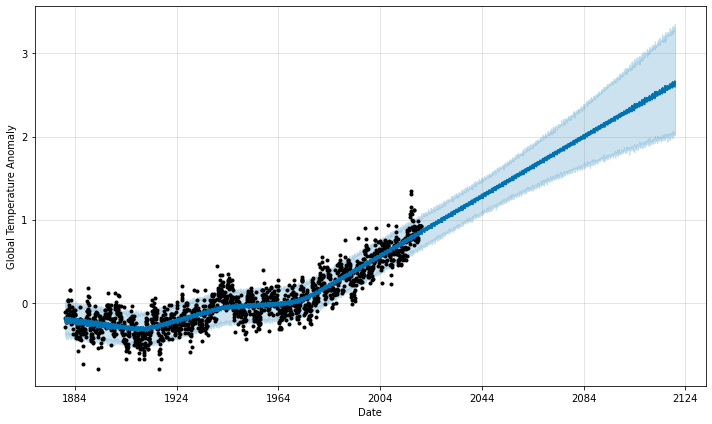

In [43]:
fig = m.plot(forecast, xlabel='Date', ylabel='Global Temperature Anomaly')

In [18]:
# The prediction of next 30 years
future2 = m.make_future_dataframe(freq='m', periods=30*12)

In [19]:
forecast2 = m.predict(future2)

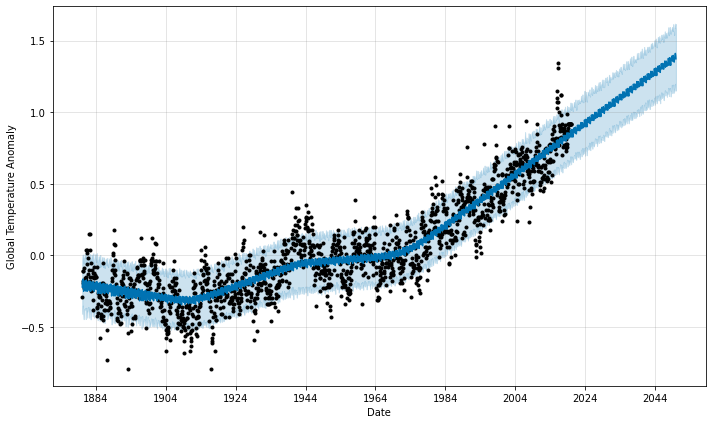

In [29]:
fig = m.plot(forecast2, xlabel='Date', ylabel='Global Temperature Anomaly')